In [1]:
import pandas as pd
import re #정규표현식 전처리
import matplotlib.pyplot as plt #시각화
import numpy as np
import datetime

from matplotlib import font_manager, rc #한글폰트
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
vod = pd.read_csv('./LG_data/01. 전처리/vod_전처리_19.csv', encoding='cp949')

In [3]:
vod

,Unnamed: 0,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,0,66875000,장군재상 10회(A),TV드라마,외화 시리즈,2472,조옥근은 엽소에게 호청의 짝사랑을 전하지만 엽소는 오히려 호청을 찾아가 호되게 나무...,"마사순,성일륜,정천,왕초연,장준명",00:43,20240123085102
1,1,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,1891,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240116203741
2,2,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,632,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240117193153
3,3,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,00:01,20240113184221
4,4,66841000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,00:08,20240113074350
...,...,...,...,...,...,...,...,...,...,...
17419,22549,64399000,(자막)주술회전 2기: 시부야 사변 16회(N),TV애니메이션,액션/모험,1276,"궁지에 몰렸던 이타도리는 토도의 격려를 받고 일어선다. 격렬한 공방 중에 이타도리,...","고죠 사토루,이타도리 유지",00:23,20240302231715
17420,22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,20240310190508
17421,22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330103945
17422,22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330171645


# 전처리

In [4]:
# 불필요한 컬럼제거 
vod.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# 로그데이터 datetime으로 만들기
vod['strt_dt'].unique()

array([20240123085102, 20240116203741, 20240117193153, ...,
       20240330103945, 20240330171645, 20240330165847], dtype=int64)

In [6]:
date = pd.to_datetime(vod.strt_dt, format = "%Y%m%d%H%M%S")
vod['datetime'] = date

In [7]:
vod['day'] = vod['datetime'].apply(lambda x : x.day)
vod['day'].unique() #결측치 없음
vod['day'].fillna(-1, inplace= False) 
vod['day'] = vod['day'].astype(int)

In [10]:
vod['hour'] = vod['datetime'].apply(lambda x : x.hour)
vod['hour'].unique() #결측치 없음
vod['hour'].fillna(-1, inplace= False)
vod['hour'] = vod['hour'].astype(int)

In [11]:
vod.reset_index(drop= False, inplace= False)

,index,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour
0,0,66875000,장군재상 10회(A),TV드라마,외화 시리즈,2472,조옥근은 엽소에게 호청의 짝사랑을 전하지만 엽소는 오히려 호청을 찾아가 호되게 나무...,"마사순,성일륜,정천,왕초연,장준명",00:43,20240123085102,2024-01-23 08:51:02,23,8
1,1,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,1891,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240116203741,2024-01-16 20:37:41,16,20
2,2,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,632,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240117193153,2024-01-17 19:31:53,17,19
3,3,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,00:01,20240113184221,2024-01-13 18:42:21,13,18
4,4,66841000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,00:08,20240113074350,2024-01-13 07:43:50,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17419,17419,64399000,(자막)주술회전 2기: 시부야 사변 16회(N),TV애니메이션,액션/모험,1276,"궁지에 몰렸던 이타도리는 토도의 격려를 받고 일어선다. 격렬한 공방 중에 이타도리,...","고죠 사토루,이타도리 유지",00:23,20240302231715,2024-03-02 23:17:15,2,23
17420,17420,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,20240310190508,2024-03-10 19:05:08,10,19
17421,17421,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330103945,2024-03-30 10:39:45,30,10
17422,17422,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330171645,2024-03-30 17:16:45,30,17


In [12]:
vod.info() #17424

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subsr           17424 non-null  int64         
 1   asset_nm        17424 non-null  object        
 2   ct_cl           17424 non-null  object        
 3   genre_of_ct_cl  17424 non-null  object        
 4   use_tms         17424 non-null  int64         
 5   SMRY            17422 non-null  object        
 6   ACTR_DISP       17422 non-null  object        
 7   disp_rtm        17424 non-null  object        
 8   strt_dt         17424 non-null  int64         
 9   datetime        17424 non-null  datetime64[ns]
 10  day             17424 non-null  int32         
 11  hour            17424 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(6)
memory usage: 1.5+ MB


In [13]:
# 00:00 형식의 datetiem -> n분으로 변경 1:43 = 103분
vod['disp_m'] = vod['disp_rtm'].dropna().apply(lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if ':' in str(x) else float('nan'))

In [14]:
vod['disp_m'].isna().sum()

0

In [15]:
# 실수형 -> 정수형 형변환
vod['disp_m'] = vod['disp_m'].fillna(0).astype(int)

In [16]:
vod['disp_m'] #minute단위

0        43
1        45
2        45
3         1
4         8
         ..
17419    23
17420     1
17421     1
17422     1
17423    32
Name: disp_m, Length: 17424, dtype: int32

# 데이터 탐색

### 1. 시간대별VOD 시청자수

In [19]:
vod_1 = vod.copy()

프로그램 이름 정규화 함수 - 회차 / ( ) / [ ] 제거

In [18]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\d+회', '', name)
    # (예고) 제거 (인어공주(2023)(예고) -> 인어공주)
    name = re.sub(r'\(.*?\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [20]:
# 프로그램 이름 정규화 적용
vod_1['asset_nm'] = vod_1['asset_nm'].apply(normalize_program_name)

vod_1['asset_nm']

0                        장군재상
1                     수호지의 무송
2                     수호지의 무송
3                 콩순이 율동교실 4기
4                         알사탕
                 ...         
17419         주술회전 2기: 시부야 사변
17420                      괴물
17421    만난지3분만에합체 저랑섹스한번하실래요
17422    만난지3분만에합체 저랑섹스한번하실래요
17423               피도 눈물도 없이
Name: asset_nm, Length: 17424, dtype: object

In [21]:
# 사라졌는지 확인
vod_1[vod_1['asset_nm'].str.contains('인어공주')]

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour,disp_m
243,61395000,인어공주,영화,SF/환타지,120,본 콘텐츠는 자막+더빙이 함께 제공되는 상품으로 서비스 해지 시까지 시청이 가능합니...,"할리 베일리,다비드 디그스,아콰피나,조나 하우어-킹",00:02,20240102210627,2024-01-02 21:06:27,2,21,2


In [22]:
# 중복 제거
vod_1 = vod_1.drop_duplicates()
vod_1.reset_index(drop=false, inplace=True)

In [23]:
vod_1.to_csv('vod+19+제목만.csv', encoding= 'cp949')

In [24]:
def grouping_hour(hour) :
    if 0 <= hour <=2 :
        hour = '오전 12시-오전 3시'
    elif 3<= hour <= 5 :
        hour = '오전 3시~오전 6시'
    elif 6 <= hour <= 8 :
        hour = '오전 6시~오전 9시'
    elif 9 <= hour <= 11 :
        hour = '오전 9시~오후 12시'
    elif 12 <= hour <= 14 :
        hour = '오후 12시~오후 3시'
    elif 15 <= hour <= 17 :
        hour = '오후 3시~오후 6시'
    elif 18 <= hour <= 20 :
        hour = '오후 6시~오후 9시'
    elif 21 <= hour <= 24 :
        hour = '오후 9시~오후 12시'
    else :
        hour = np.nan
    return hour

In [25]:
def grouping_weekday(weekday) :
    if 0 <= weekday <=5 :
        weekday = '주중'
    elif 6<= weekday <= 7 :
        weekday = '주말'
    else :
        weekday = np.nan
    return weekday

In [26]:
vod_1['start_date'] = vod_1['datetime'].dt.date  #2024-01-01 형식
vod_1['start_date'] = pd.to_datetime(vod_1['start_date'])  #datetime 형변환

In [27]:
vod_1['weekday'] = vod_1['start_date'].dt.weekday
vod_1['weekday']

0        1
1        1
2        2
3        5
4        5
        ..
17419    5
17420    6
17421    5
17422    5
17423    5
Name: weekday, Length: 17424, dtype: int32

In [28]:
vod_1['weekday_label'] = vod_1['weekday'].apply(grouping_weekday)
vod_1['weekday_label'].unique()

array(['주중', '주말'], dtype=object)

In [29]:
vod_1['start_time'] = vod_1['datetime'].dt.time  #2024-01-01 형식

In [30]:
vod_1['start_time'] = pd.to_datetime(vod_1['start_time'], format='%H:%M:%S')

In [31]:
vod_1['start_hour'] = vod_1['start_time'].dt.hour
vod_1['start_hour']

0         8
1        20
2        19
3        18
4         7
         ..
17419    23
17420    19
17421    10
17422    17
17423    16
Name: start_hour, Length: 17424, dtype: int32

In [32]:
vod_1['hour_label'] = vod_1['start_hour'].apply(grouping_hour)
vod_1['hour_label']

0         오전 6시~오전 9시
1         오후 6시~오후 9시
2         오후 6시~오후 9시
3         오후 6시~오후 9시
4         오전 6시~오전 9시
             ...     
17419    오후 9시~오후 12시
17420     오후 6시~오후 9시
17421    오전 9시~오후 12시
17422     오후 3시~오후 6시
17423     오후 3시~오후 6시
Name: hour_label, Length: 17424, dtype: object

In [33]:
vod_df = vod_1[['hour_label', 'weekday_label','subsr']]

vod_pivot = pd.pivot_table(vod_df, index=['weekday_label', 'hour_label'], values = 'subsr', aggfunc='count')

vod_pivot.sort_values(by = 'subsr', ascending= False)

vod_pivot_weekday = vod_pivot.loc['주중'].sort_values(by = 'hour_label')
vod_pivot_weekend = vod_pivot.loc['주말'].sort_values(by = 'hour_label')

vod_pivot_divided = vod_pivot.copy()


In [34]:
vod_pivot_weekday_divided = vod_pivot_weekday.copy()
vod_pivot_weekday_divided['subsr'] /= 5

vod_pivot_weekend_divided = vod_pivot_weekend.copy()
vod_pivot_weekend_divided['subsr'] /= 2

# print(vod_pivot_weekday_divided.index)
# print(vod_pivot_weekend_divided.index)

vod_combined_pivot = vod_pivot_weekday_divided.add(vod_pivot_weekend_divided, fill_value=0)
vod_combined_pivot

,subsr
hour_label,
오전 12시-오전 3시,482.1
오전 3시~오전 6시,268.7
오전 6시~오전 9시,405.9
오전 9시~오후 12시,548.9
오후 12시~오후 3시,617.1
오후 3시~오후 6시,723.6
오후 6시~오후 9시,725.2
오후 9시~오후 12시,545.8


In [35]:
vod_combined_pivot.sort_values(by = 'subsr')

,subsr
hour_label,
오전 3시~오전 6시,268.7
오전 6시~오전 9시,405.9
오전 12시-오전 3시,482.1
오후 9시~오후 12시,545.8
오전 9시~오후 12시,548.9
오후 12시~오후 3시,617.1
오후 3시~오후 6시,723.6
오후 6시~오후 9시,725.2


In [36]:
vod_pivot_weekday.sort_values(by = 'subsr')

,subsr
hour_label,
오전 3시~오전 6시,946
오전 6시~오전 9시,1397
오전 12시-오전 3시,1763
오전 9시~오후 12시,1872
오후 9시~오후 12시,1909
오후 12시~오후 3시,1988
오후 3시~오후 6시,2258
오후 6시~오후 9시,2516


In [37]:
vod_pivot_weekend.sort_values(by = 'subsr')

,subsr
hour_label,
오전 3시~오전 6시,159
오전 6시~오전 9시,253
오전 12시-오전 3시,259
오후 9시~오후 12시,328
오전 9시~오후 12시,349
오후 12시~오후 3시,439
오후 6시~오후 9시,444
오후 3시~오후 6시,544


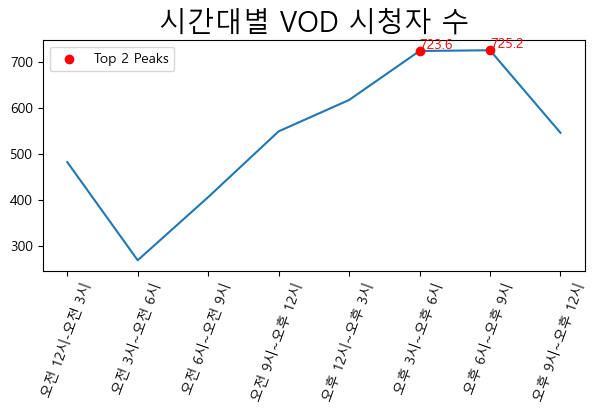

In [38]:
# 데이터프레임의 값을 숫자로 변환
vod_combined_pivot['subsr'] = pd.to_numeric(vod_combined_pivot['subsr'], errors='coerce')

# DataFrame에서 가장 큰 값 2개 찾기
top2_peaks = vod_combined_pivot.nlargest(2, 'subsr')
top2_times = top2_peaks.index

# 플롯 생성
plt.figure(figsize=(7, 3))
plt.xticks(size=10, rotation=70)
plt.title('시간대별 VOD 시청자 수', size=20)
plt.plot(vod_combined_pivot.index, vod_combined_pivot.values)

# 최대값(피크)을 플롯에 표시
plt.scatter(top2_times, top2_peaks['subsr'], color='red', label='Top 2 Peaks', zorder=5)
for time, value in zip(top2_times, top2_peaks['subsr']):
    plt.text(time, value, str(value), ha='left', va='bottom', fontsize=10, color='red')

plt.legend()

plt.show()

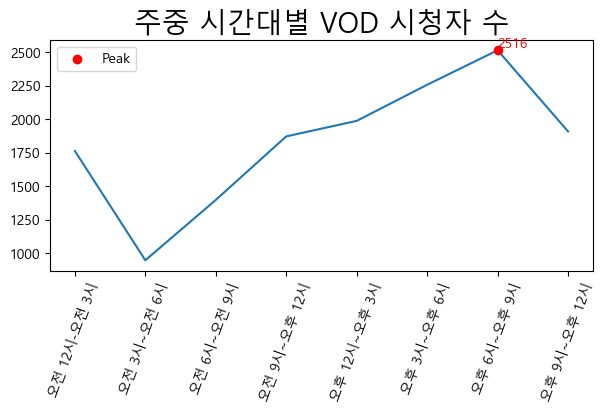

In [39]:
# DataFrame에서 최대값과 해당 인덱스(시간대) 찾기
peak_value = vod_pivot_weekday.max()
peak_times = vod_pivot_weekday.idxmax()

# 플롯 생성
plt.figure(figsize=(7, 3))
plt.xticks(size=10, rotation=70)
plt.title('주중 시간대별 VOD 시청자 수', size=20)
plt.plot(vod_pivot_weekday.index, vod_pivot_weekday.values)

# 최대값(피크)을 플롯에 표시
plt.scatter(peak_times, peak_value, color='red', label='Peak', zorder=5)
for time, value in zip(peak_times, peak_value):
    plt.text(time, value, str(value), ha='left', va='bottom', fontsize=10, color='red')

plt.legend()

plt.show()

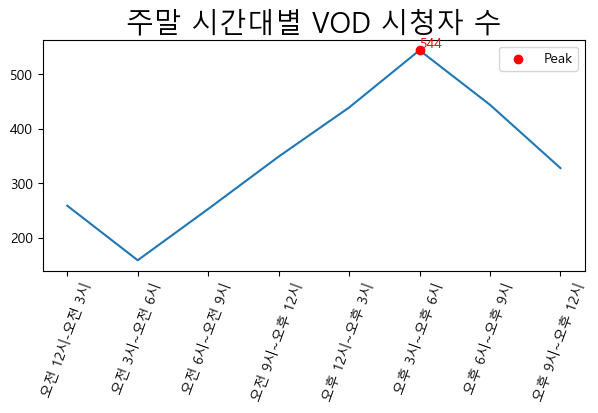

In [40]:
# DataFrame에서 최대값과 해당 인덱스(시간대) 찾기
peak_value = vod_pivot_weekend.max()
peak_times = vod_pivot_weekend.idxmax()

# 플롯 생성
plt.figure(figsize=(7, 3))
plt.xticks(size=10, rotation=70)
plt.title('주말 시간대별 VOD 시청자 수', size=20)
plt.plot(vod_pivot_weekend.index, vod_pivot_weekend.values)

# 최대값(피크)을 플롯에 표시
plt.scatter(peak_times, peak_value, color='red', label='Peak', zorder=5)
for time, value in zip(peak_times, peak_value):
    plt.text(time, value, str(value), ha='left', va='bottom', fontsize=10, color='red')

plt.legend()

plt.show()

시간대별 VOD분석

-----------------

### 2. 가장 많이 본 프로그램

In [74]:
vod_2 = vod_1[['asset_nm', 'ct_cl', 'genre_of_ct_cl', 'use_tms']]
vod_2.head()

,asset_nm,ct_cl,genre_of_ct_cl,use_tms
0,장군재상,TV드라마,외화 시리즈,2472
1,수호지의 무송,TV드라마,외화 시리즈,1891
2,수호지의 무송,TV드라마,외화 시리즈,632
3,콩순이 율동교실 4기,키즈,기타,60
4,알사탕,키즈,학습,480


In [42]:
#가장 많이 본 VOD 카테고리
vod_2.ct_cl.value_counts()

ct_cl
TV드라마       6893
영화          4159
TV 연예/오락    2688
기타          2118
TV 시사/교양     661
TV애니메이션      447
키즈           398
다큐            36
스포츠           18
우리동네           3
라이프            2
미분류            1
Name: count, dtype: int64

In [43]:
#가장 많이 본 VOD 장르
vod_2.genre_of_ct_cl.value_counts()

genre_of_ct_cl
기타          8811
외화 시리즈      3926
성인          1307
액션/어드벤쳐      973
드라마          754
애니메이션        325
코미디          237
공포/스릴러       205
멜로           194
인물/다큐        123
명랑/코믹        108
액션/모험         86
무협            80
SF/환타지        80
학습            49
다큐멘터리         34
오락            30
인물            19
추리/미스터리       18
레슬링           18
동물             9
로맨틱코미디         7
무협/환타지         6
역사             5
자연             5
호러/공포          4
연예/오락          3
학원/순정/연애       3
단편             2
운동/건강          2
미분류            1
Name: count, dtype: int64

In [76]:
#가장 많이 본 VOD 프로그램
vod_2.asset_nm.value_counts().head(30)

asset_names = vod_2['asset_nm'].value_counts().index.tolist()

In [77]:
# 가장 오래 시청한 VOD 장르 대분류 & VOD 시청 시간 평균
group = vod_2.groupby('ct_cl') #for문 > genre_of_ct_cl, group_data

result = group['use_tms'].agg(['sum', 'mean']).reset_index()
result_sorted = result.sort_values(by='sum', ascending=False)

result_sorted #대분류 12개


,ct_cl,sum,mean
2,TV드라마,13422562,1947.274336
1,TV 연예/오락,7829345,2912.702753
9,영화,6156824,1480.361625
0,TV 시사/교양,1777283,2688.779123
4,기타,1663911,785.604816
3,TV애니메이션,349827,782.610738
11,키즈,140030,351.834171
5,다큐,55404,1539.000000
8,스포츠,14531,807.277778
10,우리동네,360,120.000000


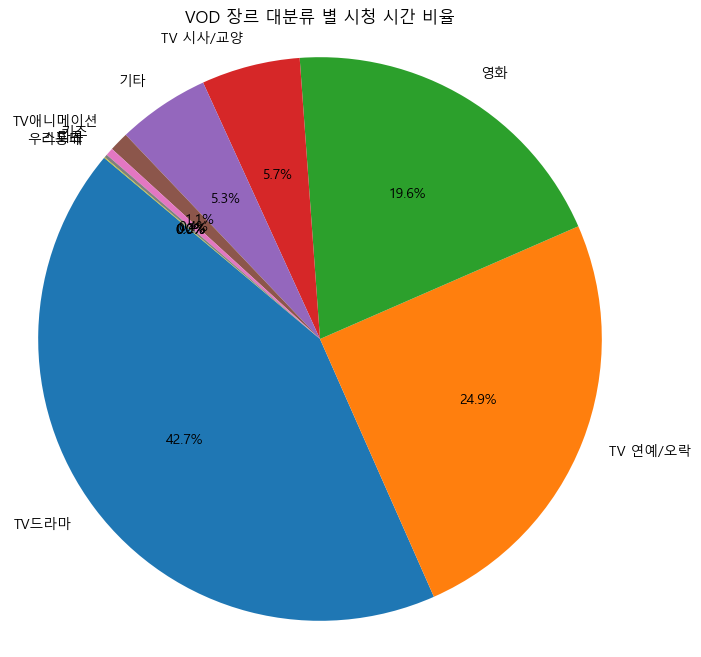

In [78]:
# 데이터 추출
labels = result_sorted['ct_cl'].head(10)
sizes = result_sorted['sum'].head(10)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 모양으로 보이도록 설정
plt.title('VOD 장르 대분류 별 시청 시간 비율')
plt.show()

In [79]:
# 가장 오래 시청한 VOD 장르 소분류 & VOD 시청 시간 평균
group = vod_2.groupby('genre_of_ct_cl') #for문 > genre_of_ct_cl, group_data

result = group['use_tms'].agg(['sum', 'mean']).reset_index()
result_sorted = result.sort_values(by='sum', ascending=False)

result_sorted.head(10)

,genre_of_ct_cl,sum,mean
2,기타,17749160,2014.431960
21,외화 시리즈,6734674,1715.403464
17,액션/어드벤쳐,2393224,2459.634121
6,드라마,1557171,2065.213528
27,코미디,485385,2048.037975
24,인물/다큐,445009,3617.959350
15,애니메이션,421715,1297.584615
1,공포/스릴러,345479,1685.263415
14,성인,295741,226.274675
9,멜로,224623,1157.850515


In [80]:
# 가장 오래 시청한 VOD 프로그램 - 제목 정규화된 df : vod_1
group = vod_2.groupby(['asset_nm', 'ct_cl'])

result = group['use_tms'].agg(['sum', 'mean']).reset_index()
result_sorted = result.sort_values(by = 'sum', ascending= False)

In [49]:
result_sorted.head(15)

,asset_nm,ct_cl,sum,mean
738,런닝맨,TV 연예/오락,718154,2861.171315
339,꼬리에꼬리를무는그날이야기,TV 시사/교양,647077,2927.950226
993,미운우리새끼,TV 연예/오락,436900,4008.256881
1321,세 번째 결혼,TV드라마,413331,1553.875940
482,내딸서영이,TV드라마,403395,2762.979452
2659,한문철의 블랙박스 리뷰,TV 시사/교양,377212,3888.783505
987,미스트롯 3,TV 연예/오락,370066,5212.197183
1039,밤에 피는 꽃,TV드라마,363731,2078.462857
1548,아내의 속사정:음란한 거래,기타,356491,871.616137
1295,서울의 봄,영화,356120,3633.877551


가장 인기있었던 배우/출연진 10명의 출연작

In [81]:
#vod가 예고/회차 포함 , vod_1이 제목 전처리
vod_2 = vod_1['ACTR_DISP']
vod_2

0                             마사순,성일륜,정천,왕초연,장준명
1                                 유대경,번장강,손요기,장한
2                                 유대경,번장강,손요기,장한
3                                            콩순이
4                                              -
                          ...                   
17419                             고죠 사토루,이타도리 유지
17420    안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타
17421                                    시노다 아유미
17422                                    시노다 아유미
17423     이소연,하연주,오창석,장세현,정찬,정혜선,양혜진,박신우,정수영,유태웅
Name: ACTR_DISP, Length: 17424, dtype: object

In [82]:
# 컴마로 구분된 문자열 리스트 변환
vod_2 = vod_1['ACTR_DISP'].str.split(',')
vod_2

0                                 [마사순, 성일륜, 정천, 왕초연, 장준명]
1                                      [유대경, 번장강, 손요기, 장한]
2                                      [유대경, 번장강, 손요기, 장한]
3                                                    [콩순이]
4                                                      [-]
                               ...                        
17419                                    [고죠 사토루, 이타도리 유지]
17420        [안도 사쿠라, 다나카 유코, 나가야마 에이타, 쿠로카와 소야, 히이라기 히나타]
17421                                            [시노다 아유미]
17422                                            [시노다 아유미]
17423    [이소연, 하연주, 오창석, 장세현, 정찬, 정혜선, 양혜진, 박신우, 정수영, 유태웅]
Name: ACTR_DISP, Length: 17424, dtype: object

In [83]:
# 이름별로 개별 행 생성
expanded_names = vod_2.explode() #동일한 행인덱스로 분할
expanded_names

0        마사순
0        성일륜
0         정천
0        왕초연
0        장준명
        ... 
17423    정혜선
17423    양혜진
17423    박신우
17423    정수영
17423    유태웅
Name: ACTR_DISP, Length: 75342, dtype: object

In [84]:
# 이름 언급 빈도 수 계산
name_counts = expanded_names.value_counts()
# '-' 값이 있는 행 삭제
name_counts = name_counts[name_counts.index != '-']
print(name_counts.head(10))

ACTR_DISP
유재석         450
마츠시타 미오리    423
안내상         413
하하          394
장도연         366
전노민         359
사사키 아키      322
김광규         278
양세찬         277
김상중         273
Name: count, dtype: int64


In [90]:
# 무슨 프로그램에 나왔는지 확인
vod_names = []
for name in name_counts.index[:10] :
  vod_names.append(vod_1[vod_1['ACTR_DISP'].str.contains(name, na=False)].asset_nm.unique())

print(vod_names)


[array(['해피투게더 시즌4', '런닝맨', '유 퀴즈 온 더 블럭', '놀면 뭐하니?', '해피투게더 시즌3',
       '설에 놀면 뭐하니? 인생라면', '일로 만난 사이', '무한도전 Classic', '2023 런닝맨 게스트 어워즈',
       '투유프로젝트-슈가맨', '식스센스', '식스센스2', '투유프로젝트-슈가맨3'], dtype=object), array(['유부녀들-섹스 스캔들', '푹 적셔주는 질펀한 마사지', '무방비 엉덩이의 간호사', '아내의 속사정:음란한 거래'],
      dtype=object), array(['세 번째 결혼', '소용없어 거짓말', '강철비2: 정상회담', '송곳', '서울의 봄', '무법변호사'],
      dtype=object), array(['런닝맨', '놀면 뭐하니?', '오은영 리포트 결혼 지옥', '무한도전 Classic',
       '2023 런닝맨 게스트 어워즈'], dtype=object), array(['태어난 김에 세계일주3', '꼬리에꼬리를무는그날이야기', '태어난 김에 세계일주2', '개는 훌륭하다',
       '전 국민 힐링쇼-푸바오와 할부지', '꼬리에 꼬리를 무는 그날 이야기 2', '꼬리에 꼬리를 무는 그날 이야기 1',
       '황금어장-라디오스타', '태어난 김에 세계일주2-미방송분깊이보기', '태어난 김에 세계일주', '인생술집',
       '금요일 금요일 밤에', '푸바오와 할부지 2'], dtype=object), array(['세 번째 결혼', '황금빛 내인생', '선덕여왕'], dtype=object), array(['총각을 찾는 욕구불만 유부녀', '흥건한 제수씨:불타는 밤', '아내의 엄마와 몰래 절정',
       '대리 만족-아내를 드립니다', '남편은 이렇게 못해줘', '내가 가져버린 사위는 몸짱', '애욕의 처제',
       '관리인 녹인 용광로 부인', '후들후들한 친구엄마', '발기부전약으로 폭발정사'], dtype=

In [92]:
for vod_name in vod_names:
    print(vod_name)

['해피투게더 시즌4' '런닝맨' '유 퀴즈 온 더 블럭' '놀면 뭐하니?' '해피투게더 시즌3' '설에 놀면 뭐하니? 인생라면'
 '일로 만난 사이' '무한도전 Classic' '2023 런닝맨 게스트 어워즈' '투유프로젝트-슈가맨' '식스센스' '식스센스2'
 '투유프로젝트-슈가맨3']
['유부녀들-섹스 스캔들' '푹 적셔주는 질펀한 마사지' '무방비 엉덩이의 간호사' '아내의 속사정:음란한 거래']
['세 번째 결혼' '소용없어 거짓말' '강철비2: 정상회담' '송곳' '서울의 봄' '무법변호사']
['런닝맨' '놀면 뭐하니?' '오은영 리포트 결혼 지옥' '무한도전 Classic' '2023 런닝맨 게스트 어워즈']
['태어난 김에 세계일주3' '꼬리에꼬리를무는그날이야기' '태어난 김에 세계일주2' '개는 훌륭하다'
 '전 국민 힐링쇼-푸바오와 할부지' '꼬리에 꼬리를 무는 그날 이야기 2' '꼬리에 꼬리를 무는 그날 이야기 1'
 '황금어장-라디오스타' '태어난 김에 세계일주2-미방송분깊이보기' '태어난 김에 세계일주' '인생술집' '금요일 금요일 밤에'
 '푸바오와 할부지 2']
['세 번째 결혼' '황금빛 내인생' '선덕여왕']
['총각을 찾는 욕구불만 유부녀' '흥건한 제수씨:불타는 밤' '아내의 엄마와 몰래 절정' '대리 만족-아내를 드립니다'
 '남편은 이렇게 못해줘' '내가 가져버린 사위는 몸짱' '애욕의 처제' '관리인 녹인 용광로 부인' '후들후들한 친구엄마'
 '발기부전약으로 폭발정사']
['밤에 피는 꽃' '나 혼자산다' '그놈 목소리' '홍천기']
['톡파원 25시' '런닝맨' '2023 런닝맨 게스트 어워즈']
['밤에 피는 꽃' '그것이알고싶다' '어쩌다 어른' 'tvN STORY 어쩌다 어른' '그것이 알고싶다 레전드 50선'
 '마리아와 여인숙']


In [93]:
# vod_names 안에 있는 array 풀어서 저장
vod_names_list = []
for vod_name in vod_names:
    vod_names_list.extend(vod_name)

# 중복 제거
vod_names_list = list(set(vod_names_list))
print(vod_names_list)

['무법변호사', '인생술집', '나 혼자산다', '런닝맨', '태어난 김에 세계일주2-미방송분깊이보기', '무한도전 Classic', '유부녀들-섹스 스캔들', '개는 훌륭하다', '오은영 리포트 결혼 지옥', '밤에 피는 꽃', '그것이 알고싶다 레전드 50선', '푹 적셔주는 질펀한 마사지', '금요일 금요일 밤에', '꼬리에 꼬리를 무는 그날 이야기 1', '선덕여왕', '마리아와 여인숙', '무방비 엉덩이의 간호사', '꼬리에꼬리를무는그날이야기', '홍천기', '꼬리에 꼬리를 무는 그날 이야기 2', '관리인 녹인 용광로 부인', '아내의 엄마와 몰래 절정', '전 국민 힐링쇼-푸바오와 할부지', '남편은 이렇게 못해줘', '투유프로젝트-슈가맨', '놀면 뭐하니?', '태어난 김에 세계일주', '그것이알고싶다', '해피투게더 시즌3', '아내의 속사정:음란한 거래', '일로 만난 사이', '황금어장-라디오스타', '발기부전약으로 폭발정사', '흥건한 제수씨:불타는 밤', '식스센스', '투유프로젝트-슈가맨3', '어쩌다 어른', '강철비2: 정상회담', '태어난 김에 세계일주3', '톡파원 25시', '황금빛 내인생', '애욕의 처제', '그놈 목소리', '식스센스2', '서울의 봄', '후들후들한 친구엄마', '소용없어 거짓말', '해피투게더 시즌4', '2023 런닝맨 게스트 어워즈', '총각을 찾는 욕구불만 유부녀', '대리 만족-아내를 드립니다', '푸바오와 할부지 2', 'tvN STORY 어쩌다 어른', '내가 가져버린 사위는 몸짱', '세 번째 결혼', '유 퀴즈 온 더 블럭', '태어난 김에 세계일주2', '설에 놀면 뭐하니? 인생라면', '송곳']


### 3. 예고 시청이 실제 본 컨텐츠 시청에 영향을 미치는지

In [17]:
#vod가 예고/회차 포함 , vod_1이 제목 전처리
vod_3 = pd.read_csv('./LG_data/01. 전처리/vod_preview.csv', encoding = 'cp949')
vod_3

,Unnamed: 0,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,0,66875000,장군재상 10회(A),TV드라마,외화 시리즈,2472,조옥근은 엽소에게 호청의 짝사랑을 전하지만 엽소는 오히려 호청을 찾아가 호되게 나무...,"마사순,성일륜,정천,왕초연,장준명",00:43,20240123085102
1,1,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,1891,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240116203741
2,2,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,632,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,20240117193153
3,3,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,00:01,20240113184221
4,4,66841000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,00:08,20240113074350
...,...,...,...,...,...,...,...,...,...,...
22552,22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,20240314131734
22553,22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,20240310190508
22554,22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330103945
22555,22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,20240330171645


In [18]:
vod_3['strt_dt'] = pd.to_datetime(vod_3['strt_dt'], format = '%Y%m%d%H%M%S')

In [19]:
vod_3['strt_dt']

0       2024-01-23 08:51:02
1       2024-01-16 20:37:41
2       2024-01-17 19:31:53
3       2024-01-13 18:42:21
4       2024-01-13 07:43:50
                ...        
22552   2024-03-14 13:17:34
22553   2024-03-10 19:05:08
22554   2024-03-30 10:39:45
22555   2024-03-30 17:16:45
22556   2024-03-30 16:58:47
Name: strt_dt, Length: 22557, dtype: datetime64[ns]

In [20]:
# 00:00 형식의 datetime -> n분으로 변경 1:43 = 103분
vod_3['disp_m'] = vod_3['disp_rtm'].dropna().apply(lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if ':' in str(x) else float('nan'))
# 실수형 -> 정수형 형변환
vod_3['disp_m'] = vod_3['disp_m'].fillna(0).astype(int)

In [21]:
vod_3['disp_m']

0        43
1        45
2        45
3         1
4         8
         ..
22552     1
22553     1
22554     1
22555     1
22556    32
Name: disp_m, Length: 22557, dtype: int32

In [22]:
# 00회, 000회, (예고), (커밍순), (예고편), 비하인드, (사전구매), (예약구매) 

# 0분~6분 - 예외
# * 살림하는 남자들 2 287회 
# * 황금어장-라디오스타 762회
# * (5CHOICE) -스파이더맨: 어크로스 더 유니버스(5CHOICE) / 악마들(5CHOICE)
# - 고려 거란 전쟁-제작 비하인드
# * 오늘 밤도 그놈을 기다리는 성인물 - 영화/성인
# * 사이언스 인 모션 - 과학 원리를 모션그래픽으로 풀어낸 콘텐츠 
# - 제습의 원리 기타/기타
# - 자물쇠의 원리 기타/기타
# - 오르골의 원리 기타/기타
# - 자외선과 피부보호 기타/기타
# - 손난로의 발열원리 기타/기타
# - 날개없는 선풍기의 원리 기타/기타
# - 바코드의 원리
# - 사람에게도 이런 기관이... 진화의 흔적 기타/기타
# - 슈퍼맨, 아이언맨 마징가Z가 싸우면 누가 이길까 기타/기타
# - 공룡이 많았던 한반도 왜 석유는 없을까?(기타/기타)
# - 투명 이빨을 드러내는 심해의 암살... (기타/기타)
# 그 외 키즈


In [23]:
preview_list = ['00회', '000회', '(예고)', '(사전구매)', '(커밍순)', '(예고편)', '(예약구매)', '비하인드'] 
preview_keyword = '|'.join(preview_list)
vod_3['preview'] = vod_3['asset_nm'].str.contains(preview_keyword, na=False)
vod_3

C:\Users\USER\AppData\Local\Temp\ipykernel_8816\1736167263.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  vod_3['preview'] = vod_3['asset_nm'].str.contains(preview_keyword, na=False)


,Unnamed: 0,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,disp_m,preview
0,0,66875000,장군재상 10회(A),TV드라마,외화 시리즈,2472,조옥근은 엽소에게 호청의 짝사랑을 전하지만 엽소는 오히려 호청을 찾아가 호되게 나무...,"마사순,성일륜,정천,왕초연,장준명",00:43,2024-01-23 08:51:02,43,False
1,1,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,1891,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,2024-01-16 20:37:41,45,False
2,2,66705000,수호지의 무송 04회,TV드라마,외화 시리즈,632,무대는 무송을 집으로 데려와 회포를 푼다. 반금련은 훤칠하고 잘생긴 무송을 보고 못...,"유대경,번장강,손요기,장한",00:45,2024-01-17 19:31:53,45,False
3,3,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,00:01,2024-01-13 18:42:21,1,False
4,4,66841000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,00:08,2024-01-13 07:43:50,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...
22552,22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2024-03-14 13:17:34,1,True
22553,22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2024-03-10 19:05:08,1,True
22554,22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2024-03-30 10:39:45,1,True
22555,22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2024-03-30 17:16:45,1,True


In [24]:
vod_3['preview'].value_counts() #preview false : 21229 /true : 1328

preview
False    21229
True      1328
Name: count, dtype: int64

In [25]:
df = vod_3[['subsr', 'asset_nm', 'strt_dt', 'disp_m', 'use_tms', 'preview']]
df.head()

,subsr,asset_nm,strt_dt,disp_m,use_tms,preview
0,66875000,장군재상 10회(A),2024-01-23 08:51:02,43,2472,False
1,66705000,수호지의 무송 04회,2024-01-16 20:37:41,45,1891,False
2,66705000,수호지의 무송 04회,2024-01-17 19:31:53,45,632,False
3,66437000,콩순이 율동교실 4기 01회,2024-01-13 18:42:21,1,60,False
4,66841000,알사탕,2024-01-13 07:43:50,8,480,False


In [26]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\d+회', '', name)
    # (예고) 제거
    name = re.sub(r'\(.*?\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [27]:
df['asset_nm'] = df['asset_nm'].apply(normalize_program_name)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_8816\4163174577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['asset_nm'] = df['asset_nm'].apply(normalize_program_name)


,subsr,asset_nm,strt_dt,disp_m,use_tms,preview
0,66875000,장군재상,2024-01-23 08:51:02,43,2472,False
1,66705000,수호지의 무송,2024-01-16 20:37:41,45,1891,False
2,66705000,수호지의 무송,2024-01-17 19:31:53,45,632,False
3,66437000,콩순이 율동교실 4기,2024-01-13 18:42:21,1,60,False
4,66841000,알사탕,2024-01-13 07:43:50,8,480,False
...,...,...,...,...,...,...
22552,66556000,괴물,2024-03-14 13:17:34,1,5,True
22553,63086000,괴물,2024-03-10 19:05:08,1,60,True
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요,2024-03-30 10:39:45,1,60,True
22555,66056000,만난지3분만에합체 저랑섹스한번하실래요,2024-03-30 17:16:45,1,60,True


In [28]:
df.preview.value_counts() #preview false : 21229 /true : 1328

preview
False    21229
True      1328
Name: count, dtype: int64

In [29]:
vod_preview_true = df[df['preview']]
# vod_preview_true = vod_preview_true[['subsr', 'asset_nm', 'strt_dt','use_tms']]
vod_preview_false = df[~df['preview']]
# vod_preview_false = vod_preview_false[['subsr', 'asset_nm', 'strt_dt','use_tms']]

# vod_preview_true

In [45]:
# 'asset_nm'이 동일한 행끼리 'subsr'와 'use_tms'를 합치기
vod_preview_true_group = vod_preview_true.groupby(['subsr', 'asset_nm']).agg({'use_tms': 'sum'}).reset_index()

# 'strt_dt'를 가장 빠른 일자로 설정하기
vod_preview_true_min_dt = vod_preview_true.groupby(['subsr', 'asset_nm']).agg({'strt_dt': 'min'}).reset_index()

# print(vod_preview_true_group) #1013
# print(vod_preview_true_min_dt) #1013

# 'subsr'와 'asset_nm' 기준으로 병합
vod_preview_true_merged = pd.merge(vod_preview_true_group, vod_preview_true_min_dt, on=['subsr', 'asset_nm'], how='left')
print(vod_preview_true_merged)

#1013편의 예고편 시청 기록

vod_preview_true_merged

         subsr          asset_nm  use_tms             strt_dt
0     59891000             서울의 봄       60 2024-02-21 11:15:11
1     59892000     같은 씨를 원하는 며느리       60 2024-02-19 21:45:08
2     59892000  불륜남에 미쳐버린 음탕한 부인       60 2024-02-21 13:45:36
3     59892000  유부녀 제자 욕정의 보충 수업       60 2024-02-21 13:43:25
4     59892000    입을 가져다 대는 시아버지       60 2024-02-19 21:42:59
...        ...               ...      ...                 ...
1008  67344000     꼬리에꼬리를무는그날이야기      500 2024-03-14 14:43:51
1009  67344000      유산으로 남겨준 새엄마        0 2024-02-16 15:59:19
1010  67348000         노량: 죽음의바다      120 2024-02-21 18:40:54
1011  67348000               데드맨       60 2024-03-24 15:47:51
1012  67348000             도그데이즈       60 2024-03-24 15:45:07

[1013 rows x 4 columns]


,subsr,asset_nm,use_tms,strt_dt
0,59891000,서울의 봄,60,2024-02-21 11:15:11
1,59892000,같은 씨를 원하는 며느리,60,2024-02-19 21:45:08
2,59892000,불륜남에 미쳐버린 음탕한 부인,60,2024-02-21 13:45:36
3,59892000,유부녀 제자 욕정의 보충 수업,60,2024-02-21 13:43:25
4,59892000,입을 가져다 대는 시아버지,60,2024-02-19 21:42:59
...,...,...,...,...
1008,67344000,꼬리에꼬리를무는그날이야기,500,2024-03-14 14:43:51
1009,67344000,유산으로 남겨준 새엄마,0,2024-02-16 15:59:19
1010,67348000,노량: 죽음의바다,120,2024-02-21 18:40:54
1011,67348000,데드맨,60,2024-03-24 15:47:51


In [46]:
# 'asset_nm'이 동일한 행끼리 'subsr'와 'use_tms'를 합치기
vod_preview_false_group = vod_preview_false.groupby(['subsr', 'asset_nm']).agg({'use_tms': 'sum'}).reset_index()

# 'strt_dt'를 가장 빠른 일자로 설정하기
vod_preview_false_min_dt = vod_preview_false.groupby(['subsr', 'asset_nm']).agg({'strt_dt': 'min'}).reset_index()

# print(vod_preview_false_group) #4797
# print(vod_preview_false_min_dt) #4797

# 'subsr'와 'asset_nm' 기준으로 병합
vod_preview_false_merged = pd.merge(vod_preview_false_group, vod_preview_false_min_dt, on=['subsr', 'asset_nm'], how='left')
vod_preview_false_merged

,subsr,asset_nm,use_tms,strt_dt
0,59879000,남편은 이렇게 못해줘,940,2024-01-09 20:28:46
1,59883000,위험한상견례,0,2024-02-15 22:56:17
2,59883000,표적,1310,2024-02-15 22:31:28
3,59890000,건강 체조,23,2024-02-23 16:22:44
4,59892000,그녀도 여친2,0,2024-02-22 14:25:27
...,...,...,...,...
4792,67356000,섹스 앤 머니,5271,2024-02-26 08:39:23
4793,67356000,아내의 속사정:음란한 거래,3817,2024-03-07 05:57:48
4794,67375000,걸어보아요,128,2024-03-10 18:32:07
4795,67391000,명성황후,99,2024-03-28 17:04:00


In [47]:
# 'subsr'와 'asset_nm'을 기준으로 병합
vod_preview_merged = pd.merge(vod_preview_true_merged, vod_preview_false_merged, on=['subsr', 'asset_nm'], suffixes=('_true', '_false'), how='inner')
vod_preview_merged #101 #101

,subsr,asset_nm,use_tms_true,strt_dt_true,use_tms_false,strt_dt_false
0,60320000,1947 보스톤,60,2024-03-09 18:20:10,165,2024-03-15 22:16:31
1,60326000,마이데몬,60,2024-03-26 20:57:11,70879,2024-03-26 20:58:20
2,60593000,레트리뷰션,60,2024-02-08 06:37:05,5294,2024-02-10 04:17:09
3,60593000,메가로돈 2,120,2024-01-09 10:26:30,6387,2024-01-09 10:29:43
4,60955000,피도 눈물도 없이,0,2024-01-13 23:11:46,15769,2024-01-25 10:41:51
...,...,...,...,...,...,...
96,66875000,외계+인 2부,120,2024-02-15 18:50:15,10521,2024-02-20 13:31:48
97,66890000,아버님 밑에 좀 빨아주세요,0,2024-02-25 09:22:15,1425,2024-02-25 09:23:37
98,67262000,꼬리에꼬리를무는그날이야기,5220,2024-01-17 01:18:48,9694,2024-01-16 22:31:45
99,67334000,재벌X형사,60,2024-02-26 10:10:00,3840,2024-02-26 10:13:00


In [48]:
#use_tms_true가 0인 값 삭제(예고편 시청x)
vod_preview_merged = vod_preview_merged[vod_preview_merged['use_tms_true'] != 0]

In [49]:
vod_preview_merged #78rows

,subsr,asset_nm,use_tms_true,strt_dt_true,use_tms_false,strt_dt_false
0,60320000,1947 보스톤,60,2024-03-09 18:20:10,165,2024-03-15 22:16:31
1,60326000,마이데몬,60,2024-03-26 20:57:11,70879,2024-03-26 20:58:20
2,60593000,레트리뷰션,60,2024-02-08 06:37:05,5294,2024-02-10 04:17:09
3,60593000,메가로돈 2,120,2024-01-09 10:26:30,6387,2024-01-09 10:29:43
5,61173000,스토커,60,2024-03-13 14:27:42,8311,2024-03-13 15:09:03
...,...,...,...,...,...,...
95,66873000,재벌X형사,60,2024-01-30 21:20:34,49878,2024-01-27 21:20:55
96,66875000,외계+인 2부,120,2024-02-15 18:50:15,10521,2024-02-20 13:31:48
98,67262000,꼬리에꼬리를무는그날이야기,5220,2024-01-17 01:18:48,9694,2024-01-16 22:31:45
99,67334000,재벌X형사,60,2024-02-26 10:10:00,3840,2024-02-26 10:13:00


In [182]:
vod_preview_merged.to_csv('./3. vod_preview_분석.csv', encoding = 'cp949')

#### 총 1013개 데이터에서 78개 정도의 영향 : 7.7%정도

### 4. contents 페이지에 머무른 시간이 실제 시청 시간에 영향을 미치는지

In [33]:
#vod가 예고 회차 포함, vod_1이 제목 전처리
vod_4 = vod[['subsr', 'asset_nm', 'disp_m', 'datetime', 'use_tms']]
vod_4.head()

,subsr,asset_nm,disp_m,datetime,use_tms
0,66875000,장군재상 10회(A),43,2024-01-23 08:51:02,2472
1,66705000,수호지의 무송 04회,45,2024-01-16 20:37:41,1891
2,66705000,수호지의 무송 04회,45,2024-01-17 19:31:53,632
3,66437000,콩순이 율동교실 4기 01회,1,2024-01-13 18:42:21,60
4,66841000,알사탕,8,2024-01-13 07:43:50,480


In [34]:
vod_4.info() #17424

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17424 entries, 0 to 17423
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   subsr     17424 non-null  int64         
 1   asset_nm  17424 non-null  object        
 2   disp_m    17424 non-null  int32         
 3   datetime  17424 non-null  datetime64[ns]
 4   use_tms   17424 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 612.7+ KB


In [35]:
vod_4.dropna(subset = ['datetime'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\869020551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_4.dropna(subset = ['datetime'], inplace=True)


In [36]:
contents = pd.read_csv('./LG_data/01. 전처리/contents_전처리_19.csv', encoding= 'cp949')
contents.drop(['Unnamed: 0'], axis=1, inplace=True)

In [38]:
date = pd.to_datetime(contents.log_dt, format = "%Y%m%d%H%M%S")
contents['datetime'] = date

print(contents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73247 entries, 0 to 73246
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subsr           73247 non-null  int64         
 1   series_nm       24361 non-null  object        
 2   super_asset_nm  73247 non-null  object        
 3   ct_cl           73247 non-null  object        
 4   genre_of_ct_cl  73247 non-null  object        
 5   SMRY            73247 non-null  object        
 6   ACTR_DISP       73247 non-null  object        
 7   disp_rtm        68376 non-null  object        
 8   log_dt          73247 non-null  int64         
 9   datetime        73247 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 5.6+ MB
None


In [39]:
contents['datetime']

0       2024-01-04 14:00:53
1       2024-01-12 02:45:34
2       2024-01-24 22:12:13
3       2024-01-05 09:08:08
4       2024-01-06 01:34:07
                ...        
73242   2024-03-13 00:10:30
73243   2024-03-25 09:57:01
73244   2024-03-23 12:07:14
73245   2024-03-29 00:10:10
73246   2024-03-29 00:10:12
Name: datetime, Length: 73247, dtype: datetime64[ns]

In [40]:
contents.reset_index(drop=True, inplace=True)

In [41]:
# 00:00 형식의 datetiem -> n분으로 변경
contents['disp_m'] = contents['disp_rtm'].dropna().apply(lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if ':' in str(x) else float('nan'))
contents['disp_m']

0          NaN
1          NaN
2        116.0
3        112.0
4        112.0
         ...  
73242     45.0
73243     30.0
73244     30.0
73245     46.0
73246     46.0
Name: disp_m, Length: 73247, dtype: float64

In [42]:
contents_4 = contents[['subsr', 'super_asset_nm', 'disp_m', 'datetime']]
contents_4.columns = ['subsr', 'asset_nm', 'disp_m', 'datetime']

In [43]:
contents_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73247 entries, 0 to 73246
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   subsr     73247 non-null  int64         
 1   asset_nm  73247 non-null  object        
 2   disp_m    68376 non-null  float64       
 3   datetime  73247 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [44]:
contents_4.dropna(subset = ['datetime'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\570204290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_4.dropna(subset = ['datetime'], inplace=True)


In [57]:
preview_list = ['0회', '00회', '000회', '(예고)', '(사전구매)', '(커밍순)', '(예고편)', '(예약구매)', '비하인드', '(예고편 1)',
                ] 
preview_keyword = '|'.join(preview_list)
vod_4['preview'] = vod_4['asset_nm'].str.contains(preview_keyword, na=False)
vod_4

contents_4['preview'] = contents_4['asset_nm'].str.contains(preview_keyword, na=False)

vod_5 = vod_4[vod_4['preview'] == False]
contents_5 = contents_4[contents_4['preview'] == False]

vod_5
contents_5['asset_nm']

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\3997462057.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  vod_4['preview'] = vod_4['asset_nm'].str.contains(preview_keyword, na=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_17128\3997462057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_4['preview'] = vod_4['asset_nm'].str.contains(preview_keyword, na=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_17128\3997462057.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  contents_4['preview'] = contents_4['asset_nm'].str.contains(preview_keyword, na=False)
C

0                           유혹2
1                          2차노출
2                           마들렌
3                       1번가의 기적
4                       1번가의 기적
                  ...          
73242    매화홍도 : 미스터 앤 미세스 첸 24회
73243                눈떠보니 라떼 3회
73244                눈떠보니 라떼 3회
73245              내 이야기는 길어 1회
73246              내 이야기는 길어 1회
Name: asset_nm, Length: 69433, dtype: object

vod/contents의 asset_nm의 ()를 포함한 문자열 제거

In [61]:
# 프로그램 이름 정규화 함수
# 회차 정보는 남기기
def normalize_program_name(name):
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\([^)]*\)', '', name).strip()
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [62]:
# 프로그램 이름 정규화 적용
vod_5['asset_nm'] = vod_5['asset_nm'].apply(normalize_program_name)
vod_5['asset_nm']

vod_5['asset_nm'].head(30)

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\2868871536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_5['asset_nm'] = vod_5['asset_nm'].apply(normalize_program_name)


1             수호지의 무송 04회
2             수호지의 무송 04회
3         콩순이 율동교실 4기 01회
4                     알사탕
5                  섹스 솔루션
6                 가남전 03회
7                 가남전 03회
9              며느리 완전 정복!
10          설산비호 1999 05회
11          백앤아 Part4 14회
12               산하월명 01회
13       성하장명 : 제왕의 별 03회
14         체액에 젖은 형수님의 팬티
15      줄듯 말 듯 애간장 태우는 여친
16             진격적황후2 05회
17             진격적황후2 05회
18            톡파원 25시 85회
19            톡파원 25시 85회
20            명월증조강동한 22회
21    초면에 삽입까지 허락한 G컵 유혹녀
22    초면에 삽입까지 허락한 G컵 유혹녀
23    초면에 삽입까지 허락한 G컵 유혹녀
24            우아한 제국 102회
25          민감한 뿌리 흔드는 그녀
26          민감한 뿌리 흔드는 그녀
27          민감한 뿌리 흔드는 그녀
28     신비아파트 고스트볼의 비밀 01회
29     신비아파트 고스트볼의 비밀 01회
30                1번가의 기적
31                1번가의 기적
Name: asset_nm, dtype: object

In [64]:
# 프로그램 이름 정규화 적용
contents_5['asset_nm'] = contents_5['asset_nm'].apply(normalize_program_name)
contents_5['asset_nm']

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\2241759027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_5['asset_nm'] = contents_5['asset_nm'].apply(normalize_program_name)


0                           유혹2
1                          2차노출
2                           마들렌
3                       1번가의 기적
4                       1번가의 기적
                  ...          
73242    매화홍도 : 미스터 앤 미세스 첸 24회
73243                눈떠보니 라떼 3회
73244                눈떠보니 라떼 3회
73245              내 이야기는 길어 1회
73246              내 이야기는 길어 1회
Name: asset_nm, Length: 69433, dtype: object

In [74]:
vod_5['strt_date'] = vod_5['datetime'].dt.date
contents_5['strt_date'] = contents_5['datetime'].dt.date


vod_5['datetime'] = vod_5['datetime'].dt.time
contents_5['datetime'] = contents_5['datetime'].dt.time

vod_5['strt_date']

C:\Users\USER\AppData\Local\Temp\ipykernel_17128\2799545213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_5['strt_date'] = vod_5['datetime'].dt.date
C:\Users\USER\AppData\Local\Temp\ipykernel_17128\2799545213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_5['strt_date'] = contents_5['datetime'].dt.date
C:\Users\USER\AppData\Local\Temp\ipykernel_17128\2799545213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1        2024-01-16
2        2024-01-17
3        2024-01-13
4        2024-01-13
5        2024-01-19
            ...    
17416    2024-03-06
17417    2024-03-09
17418    2024-03-19
17419    2024-03-02
17423    2024-03-30
Name: strt_date, Length: 15672, dtype: object

In [75]:
first_start_times = vod_5.groupby(['subsr', 'asset_nm']).agg({'use_tms': 'sum', 'strt_date' : 'min', 'datetime' : 'min'}).reset_index()
first_access_times = contents_5.groupby(['subsr', 'asset_nm']).agg({'strt_date' : 'min', 'datetime' : 'min'}).reset_index()

# print(first_start_times) #14546
# print(first_access_times) #43512

In [76]:
first_start_times #9852

,subsr,asset_nm,use_tms,strt_date,datetime
0,59879000,남편은 이렇게 못해줘,940,2024-01-09,20:28:46
1,59883000,표적,1310,2024-02-15,22:31:28
2,59899000,0시,160,2024-03-01,21:27:35
3,59899000,겨울부인,119,2024-03-01,21:39:13
4,59899000,경마장가는길,456,2024-03-01,21:41:26
...,...,...,...,...,...
9847,67356000,색에 놀다,1966,2024-02-25,08:26:26
9848,67356000,섹스 앤 머니,5271,2024-02-26,08:39:23
9849,67356000,아내의 속사정:음란한 거래,3817,2024-03-07,05:57:48
9850,67375000,걸어보아요,128,2024-03-10,18:32:07


In [77]:
first_access_times #26205 rows

,subsr,asset_nm,strt_date,datetime
0,59879000,간신,2024-01-19,05:26:23
1,59879000,남편은 이렇게 못해줘,2024-01-09,20:28:44
2,59880000,도그데이즈,2024-03-09,09:22:41
3,59882000,한글용사 아이야 시즌3 4회,2024-03-24,08:32:25
4,59883000,마크맨,2024-02-15,22:53:40
...,...,...,...,...
26200,67400000,아내 대신 채워준 야한 장모님,2024-03-31,22:32:16
26201,67400000,유산으로 남겨준 새엄마,2024-03-31,22:31:52
26202,67400000,조건섹스 : 라스트 원나잇,2024-03-31,22:49:22
26203,67400000,편의점 털다 아랫도리 털린 유부녀,2024-03-31,22:31:58


In [78]:
#기본적으로 inner join - 왼쪽 데이터 프레임을 기준으로 병합하고 오른쪽프레임에 해당하는 행이 없는 경우 행을 삭제
#datetime_access가 없는 경우에 drop함
vod_content_merged = pd.merge(first_start_times, first_access_times, on=['subsr', 'asset_nm'], suffixes=('_start', '_access'))


In [80]:
vod_content_merged #4861

vod_content_prior = vod_content_merged[vod_content_merged['strt_date_start'] > vod_content_merged['strt_date_access']]
vod_content_prior #788

,subsr,asset_nm,use_tms,strt_date_start,datetime_start,strt_date_access,datetime_access
29,59937000,색에 놀다,133,2024-02-21,01:52:01,2024-02-03,00:32:48
32,60020000,나폴레옹,527,2024-01-21,17:20:33,2024-01-14,12:52:06
33,60050000,97분,5295,2024-03-05,01:45:01,2024-01-31,01:44:21
34,60050000,도그맨,6587,2024-03-02,16:40:42,2024-02-25,00:04:39
70,60050000,오싱 126회,581,2024-01-30,18:34:18,2024-01-25,11:38:38
...,...,...,...,...,...,...,...
4817,67303000,더 이퀄라이저 3,12348,2024-02-15,19:27:33,2024-01-10,16:45:20
4820,67303000,용감한 시민,6903,2024-03-04,18:24:24,2024-03-02,06:16:19
4823,67303000,인간극장 3493회,1969,2024-02-17,08:24:30,2024-02-16,08:23:47
4839,67334000,노량: 죽음의바다,5951,2024-02-06,13:46:00,2024-02-05,13:43:19


In [313]:
# # 두 datetime 객체 간의 뺄셈을 통해 시간 차이를 계산
# vod_content_merged['time_difference'] = vod_content_merged['datetime_start'] - vod_content_merged['datetime_access']

# # 결과 확인
# vod_content_merged['time_difference']

0      0 days 00:00:02
1      0 days 00:00:17
2      0 days 00:03:01
3      0 days 00:00:04
4      0 days 00:00:04
             ...      
7330   0 days 00:00:13
7331   0 days 00:00:17
7332   0 days 00:05:30
7333   0 days 00:00:10
7334   0 days 00:00:10
Name: time_difference, Length: 7335, dtype: timedelta64[ns]

In [318]:
# vod_content_merged['time_difference'] = vod_content_merged['time_difference'].dt.total_seconds().astype(int)

상세페이지에 머문 시간에 따라 시청으로 이어지는지 여부